In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

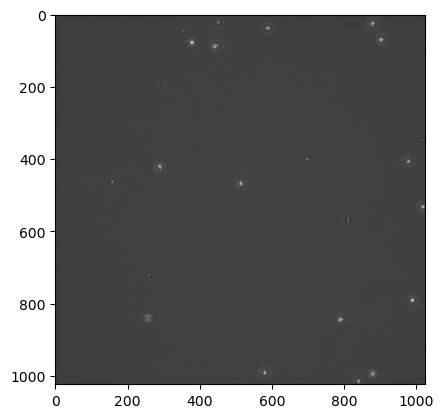

In [3]:
videofile = "ExampleVideos/20X Ph 149Fps Wash 1 16 P018cu R3.mp4"
#videofile = "ExampleVideos/10X_LD_1024_R1.avi"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [15]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
#tails = frames<np.median(frames,axis=0)
#frames[np.where(tails)] = 255
frames = np.abs(frames.astype(np.float64) - np.median(frames,axis=0))
frames = 255*frames/np.max(frames)
frames = frames.astype(np.uint8)

plt.imshow(frames[0],cmap='gray')
plt.show()
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

#print(t.head())

Frame 149: 8 trajectories present.


In [16]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [01:54<00:00,  1.32it/s]


            y           x         mass      size       ecc      signal  \
0   70.522995  902.485553  2747.769718  3.087680  0.140020   72.816602   
1   78.012519  378.665908  3715.056066  2.542780  0.061704  119.795055   
2   89.377988  441.813491  1984.839640  2.899214  0.434193   78.454017   
3  421.048990  289.756839  2627.504878  2.972308  0.152141   69.997895   
4  468.930721  513.403405  2373.351447  2.665504  0.337677   97.245398   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    8022.0  0.004945      0      0   149     896      66      51      18   
1   10471.0  0.003773      0      1    65     375      74       9       9   
2    7101.0  0.005600      0      2   133     437      72      31      25   
3    8102.0  0.004896      0      3   176     263     416      32      52   
4    7569.0  0.005247      0      5   126     511     424       7      52   

                                        segmentation  
0  [[66, 901], [66, 902], [66, 903], 

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.calcAverageSpeed(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

In [17]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, final, visualization="segments")

(17, 3)
Video Finished.
